In [ ]:
"""Preprocess data that consist of .obj to .binvox"""

from utils import Preprocessor

preprocessor = Preprocessor(
    use_to_mirror=False,
    use_to_rotate=False,
    use_to_overwrite=True,
    use_to_plot =False,
    plot_voxels=True,
    binvox_resolution=32,
    rotation_interval=7.2,
    rotation_max=360,
)

preprocessor.preprocess()

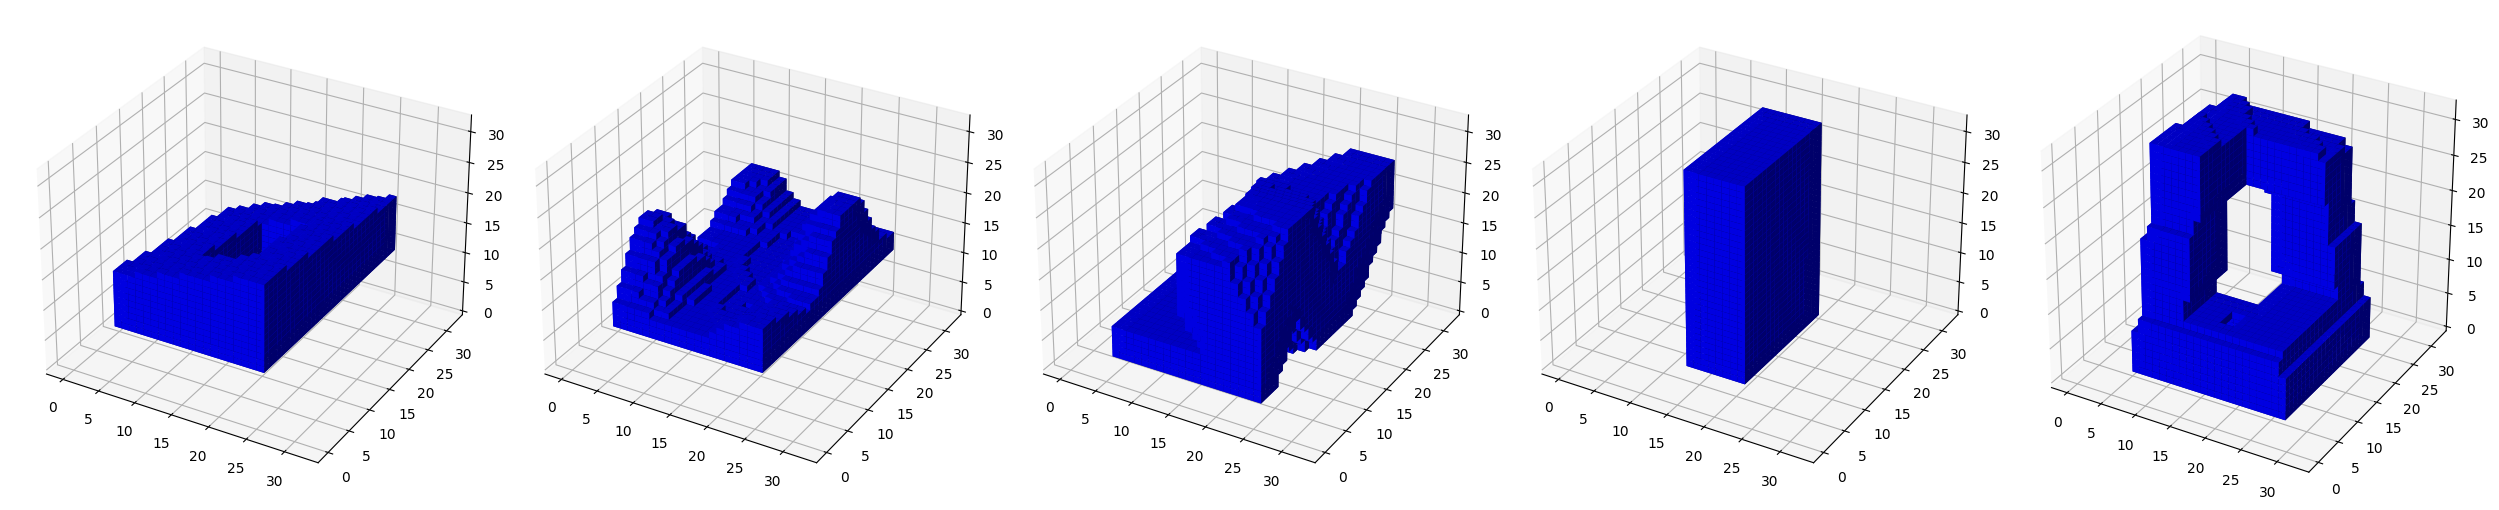

In [11]:
from utils import Utils

import binvox_rw

data_paths_to_plot = [
    r"data\preprocessed\79ANDPARK\79ANDPARK.binvox",
    r"data\preprocessed\LEGOTOWERS\LEGOTOWERS.binvox",
    r"data\preprocessed\RED7\RED7.binvox",
    r"data\preprocessed\VANCOUVERHOUSE\VANCOUVERHOUSE.binvox",
    r"data\preprocessed\CCTVHEADQUARTER\CCTVHEADQUARTER.binvox"
]

data_list = []
for data_path_to_plot in data_paths_to_plot:
    with open(data_path_to_plot, 'rb') as f:
        model = binvox_rw.read_as_3d_array(f)
        data_list.append(model.data)

Utils.plot_binvox(data_list=data_list, plot_voxels=True, figsize=(50, 50))

In [1]:
import torch
from torch.utils.data import DataLoader

from model import BinvoxDataset, Generator, Discriminator, MassGANTrainer
from config import Config

"""Define dataloader for training"""
dataset = BinvoxDataset(data_path=Config.DATA_PREPROCESSED_DIR_MERGED)
dataloader = DataLoader(
    dataset, 
    batch_size=Config.BATCH_SIZE, 
    shuffle=True,
)

"""Define trainer for the massGAN training"""
trainer = MassGANTrainer(x``
    generator=Generator(z_dim=Config.Z_DIM),
    discriminator=Discriminator(),
    dataloader=dataloader,
    epochs=Config.EPOCHS,
    loss_function=torch.nn.BCELoss(),
    learning_rate=Config.LEARNING_RATE,
    seed=Config.SEED,
    initial_weights_key=Config.XAVIER,
    pths_dir=Config.PTHS_DIR,
)

Seeds status:
  Seeds set for torch        : 777
  Seeds set for torch on GPU : 777
  Seeds set for numpy        : 777
  Seeds set for random       : 777


Batches in 11900/20000 epoch: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


11900/20000 Loss status:
  loss g: 4.369918346405029
  loss d: 0.08439695835113525


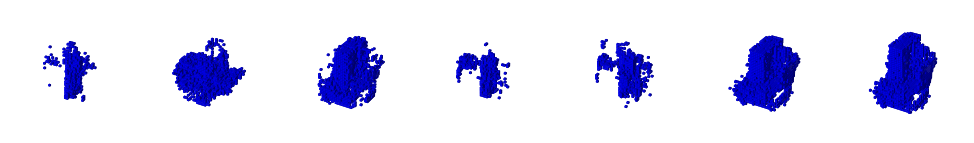

Batches in 11901/20000 epoch: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Batches in 11902/20000 epoch:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
"""Training models!!!"""

trainer.train()

In [ ]:
from utils import Utils
from config import Config
from model import Generator, MassGANTrainer

import torch

# generator = Generator(z_dim=Config.Z_DIM)
# with torch.no_grad():
#     generator.eval()
#     generator.load_state_dict(
#         torch.load(
#             r"pths\2023-10-21 11-07-50.367933\generator_epoch_780.pth", 
#             map_location=torch.device("cuda")
#         )
#     )

#     Utils.plot_interpolated_masses(generator=generator, num_steps=10, num_masses=2)